In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# 导入boston数据
boston = load_boston()
x = boston['data']
y = boston['target']

In [4]:
# 切分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
# 数据归一化
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [6]:
# 将数据从numpy的ndarray格式转换成pytorch的Tensor格式，并以float32格式便于神经网络处理
x_train = torch.from_numpy(x_train).float()               # torch.from_numpy转换成Tensor;  .float转换成float32
x_test = torch.from_numpy(x_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [7]:
# 定义网络，继承nn.Module类
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13,10,bias=True)
        self.fc2 = nn.Linear(10,1,bias=True)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x).squeeze(1)
        return x

In [8]:
# 实例化网络
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=13, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [9]:
print('查看可求导的参数：')
for name, param in net.named_parameters():
    if param.requires_grad:
        print(name)

查看可求导的参数：
fc1.weight
fc1.bias
fc2.weight
fc2.bias


In [10]:
# 定义超参数，epoch, lr, loss, optimizer
epoch = 2000
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
# 记录loss的变化
train_loss_curve = [] 

In [12]:
# 训练网络
for i in range(epoch):
    y_pred = net(x_train)                     # 得到此刻的预测结果    
    optimizer.zero_grad()                     # 将上一步的优化器里的梯度清零
     
    loss = criterion(y_pred, y_train)         # 计算loss
    train_loss_curve.append(loss)             # 记录loss
    
    loss.backward()                           # 求梯度 反向传播
    optimizer.step()                          # 更新参数

In [13]:
len(train_loss_curve)

2000

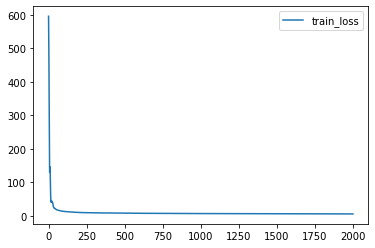

In [14]:
# 绘制loss曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(train_loss_curve)), train_loss_curve, label='train_loss')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.detach().numpy(), net(x_test).detach().numpy())
print('测试集MSE:', mse)

测试集MSE: 7.9340043
